In [1]:
#linear regression
#multiple linear regression
#Lasso regression(l1)
#Ridge regression(l2)
#Elasticnet (L1+L2)
#Polynimial
# Decision
# SVM -SVR
# Random forest
# ....

In [2]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
               na_values='?', header=None, sep="\s+")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.isna().sum()

0    0
1    0
2    0
3    6
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer 
si=SimpleImputer(strategy='most_frequent')
df=si.fit_transform(df)
df=pd.DataFrame(df)
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[8]=le.fit_transform(df[8])
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,49
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,36
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,231
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,14
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,161


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
cols=df.columns
df=df.astype(float)
print(df.dtypes)

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object


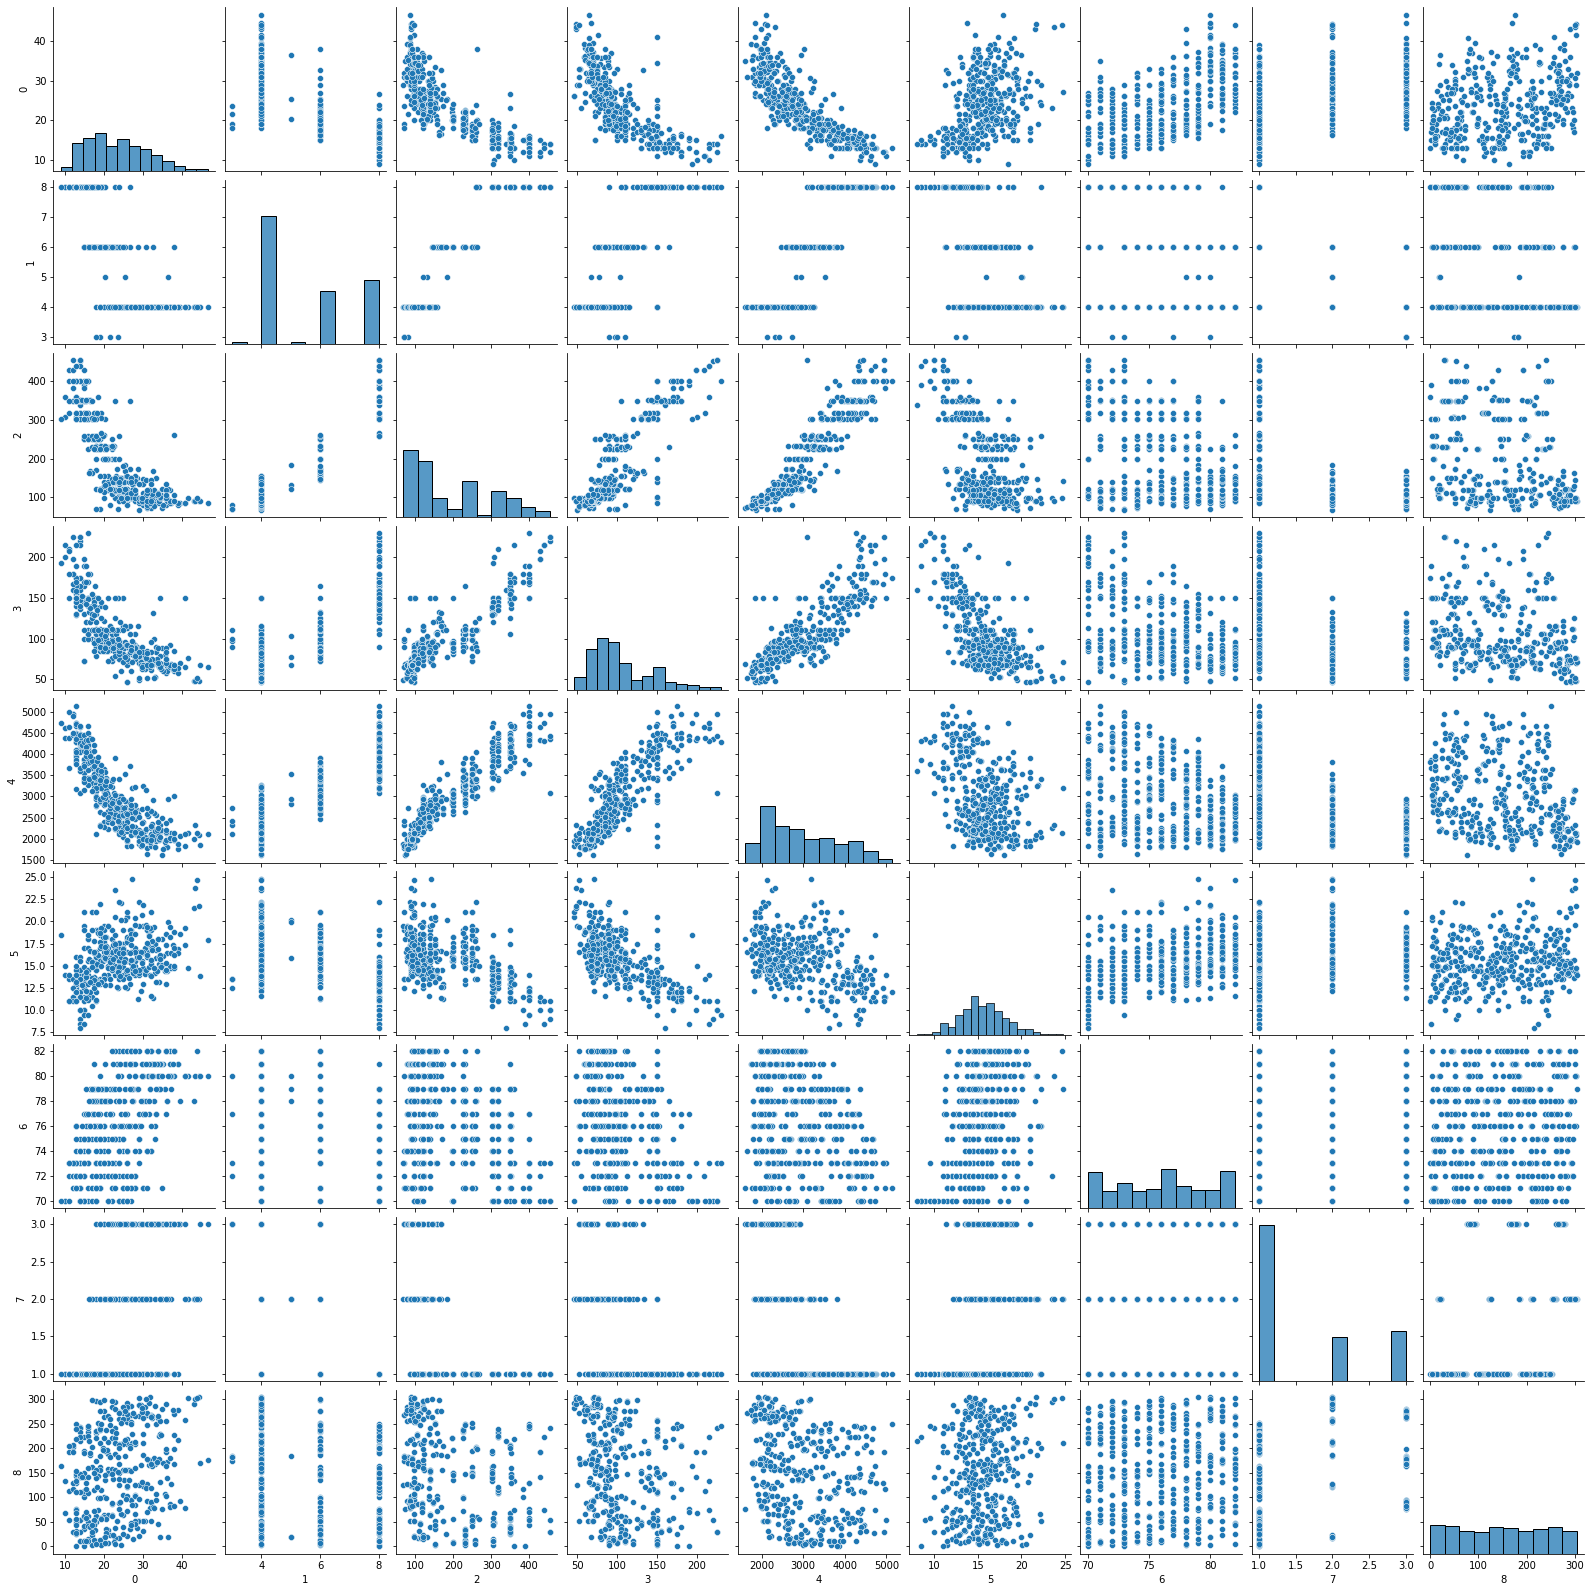

In [13]:
sns.pairplot(df[cols])
plt.show()

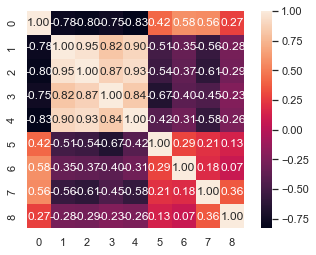

In [15]:
import numpy as np
# print(df.corr(numeric_only=True))
# print(df.dtypes)


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size':12},
    yticklabels=cols,
    xticklabels=cols
)
plt.show(hm)
#hm=sns.heatmap(cm, annot=True)
#plt.show(hm)

In [16]:
data=df[4]
data=np.array(data)
data=data.reshape(-1,1)


In [17]:
data.shape

(398, 1)

In [18]:
target=df[0]

In [19]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(data, target, test_size=0.3)

In [78]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression() 
lr.fit(x_train, y_train)
# print(lr.predict(x_test))
# lr.predict(x_test)

array([27.47533947, 26.02622261, 14.51718396, 32.62351779, 17.3696561 ,
       25.26352952, 29.57274545, 14.24261445, 17.56032937, 29.45071455,
       18.32302245, 15.59258121, 29.08462187, 15.18072694, 23.54747008,
       31.13626627, 26.51434618, 21.98394926, 30.25916922, 28.54310978,
       14.87564971, 14.42566079, 12.75536294, 25.41606814, 32.2803059 ,
       30.40408091, 10.16983338, 26.89569272, 31.17440093, 19.62722763,
       21.37379479, 18.30776859, 24.42456713, 14.05194118, 11.96216213,
       18.00269136,  7.89700799,  9.91814466, 32.58538313, 29.76341872,
       29.76341872, 14.47142238, 21.67887202, 27.01772362, 28.55836365,
       29.64901476, 26.59824242, 32.31844055, 29.53461079, 22.96782334,
       24.15762455, 19.70349694, 19.77976624, 27.21602382, 23.89068197,
       24.38643247, 12.60282432, 28.87869474, 23.54747008, 17.52219471,
       30.10663061, 18.75013058, 27.64313194, 23.39493146, 30.79305438,
       22.06021857, 30.25916922, 33.70654197, 19.80264704, 31.13

In [21]:
from sklearn.metrics import mean_squared_error, r2_score 
print("Train MSE: ", mean_squared_error(y_train, lr.predict(x_train))) 
print("Test MSE: ", mean_squared_error(y_test, lr.predict(x_test))) 
print("train r2: ", r2_score(y_train, lr.predict(x_train))) 
print("test r2: ", r2_score(y_test, lr.predict(x_test)))

Train MSE:  19.32250786995642
Test MSE:  17.618149316049024
train r2:  0.677142925111683
test r2:  0.720947435992886


In [22]:
from sklearn.linear_model import RANSACRegressor 
rn=RANSACRegressor(LinearRegression(), min_samples=50, max_trials=100)
rn.fit(x_train, y_train)

RANSACRegressor(estimator=LinearRegression(), min_samples=50)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score 
print("Train MSE: ", mean_squared_error(y_train, rn.predict(x_train))) 
print("Test MSE: ", mean_squared_error(y_test, rn.predict(x_test))) 
print("train r2: ", r2_score(y_train, rn.predict(x_train))) 
print("test r2: ", r2_score(y_test, rn.predict(x_test)))

Train MSE:  21.158435452977333
Test MSE:  20.928911835937175
train r2:  0.6464666685330773
test r2:  0.668508513299011


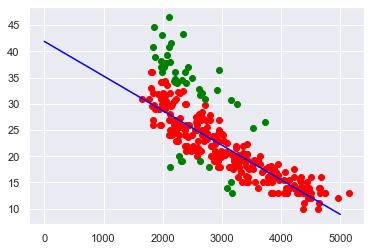

In [24]:
inlier_mask = rn.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
plt.scatter(x_train[inlier_mask], y_train[inlier_mask], c='red')
plt.scatter(x_train[outlier_mask], y_train[outlier_mask], c='green')
a = np.arange(0,5000)[:, np.newaxis]
b = rn.predict(a)
plt.plot(a,b, c="blue")
plt.show()


In [25]:
df.shape

(398, 9)

In [31]:
# Multiple linear regression
data1 = df.drop(columns=[0])
data.shape

(398, 1)

In [27]:
from sklearn.linear_model import Lasso

In [32]:
l1= Lasso()
l1.fit(x_train, y_train)

Lasso()

In [41]:
print("Train MSE: ", mean_squared_error(y_train, l1.predict(x_train))) 
print("Test MSE: ", mean_squared_error(y_test, l1.predict(x_test))) 
print("train r2: ", r2_score(y_train, l1.predict(x_train))) 
print("test r2: ", r2_score(y_test, l1.predict(x_test)))

Train MSE:  19.322509305333764
Test MSE:  17.618497912323775
train r2:  0.6771429011281642
test r2:  0.7209419146022717


In [46]:
from sklearn.linear_model import Ridge
r1 = Ridge()
r1.fit(x_train, y_train)

Ridge()

In [47]:
print("Train MSE: ", mean_squared_error(y_train, r1.predict(x_train))) 
print("Test MSE: ", mean_squared_error(y_test, r1.predict(x_test))) 
print("train r2: ", r2_score(y_train, r1.predict(x_train))) 
print("test r2: ", r2_score(y_test, r1.predict(x_test)))


Train MSE:  19.322507869956425
Test MSE:  17.61814932556988
train r2:  0.677142925111683
test r2:  0.7209474358420858


In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
en = ElasticNet() #l1_ratio=0.3 you can give as perameter for defining l1, l2 ratio.
en.fit(x_train,y_train)

ElasticNet()

In [50]:
print("Train MSE: ", mean_squared_error(y_train, en.predict(x_train))) 
print("Test MSE: ", mean_squared_error(y_test, en.predict(x_test))) 
print("train r2: ", r2_score(y_train, en.predict(x_train))) 
print("test r2: ", r2_score(y_test, en.predict(x_test)))


Train MSE:  19.322508234294872
Test MSE:  17.618324552669403
train r2:  0.6771429190240028
test r2:  0.720944660433016


In [51]:
from sklearn.preprocessing import PolynomialFeatures
quardatic = PolynomialFeatures(degree=2)
x_train_quad = quardatic.fit_transform(x_train)

In [52]:
lr2 = LinearRegression()

In [53]:
lr2.fit(x_train_quad, y_train)

LinearRegression()

In [54]:
x_test_quad = quardatic.fit_transform(x_test)

In [55]:
print("Train MSE: ", mean_squared_error(y_train, lr2.predict(x_train_quad))) 
print("Test MSE: ", mean_squared_error(y_test, lr2.predict(x_test_quad))) 
print("train r2: ", r2_score(y_train, lr2.predict(x_train_quad))) 
print("test r2: ", r2_score(y_test, lr2.predict(x_test_quad)))


Train MSE:  18.042952944939916
Test MSE:  15.910846832097983
train r2:  0.6985228289538803
test r2:  0.7479892737668602


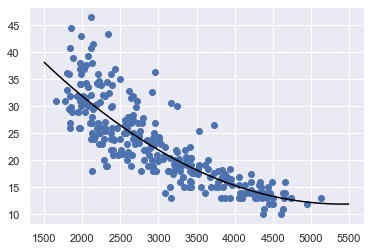

In [65]:
plt.scatter(x_train, y_train)
# plt.show()
a=np.arange(1500,5500)[:,np.newaxis]
b=lr2.predict(quardatic.fit_transform(a))
plt.plot(a,b,c="black")
plt.show()

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [69]:
print("Train MSE: ", mean_squared_error(y_train, dt.predict(x_train))) 
print("Test MSE: ", mean_squared_error(y_test, dt.predict(x_test))) 
print("train r2: ", r2_score(y_train, dt.predict(x_train))) 
print("test r2: ", r2_score(y_test, dt.predict(x_test)))

Train MSE:  1.6089748201438847
Test MSE:  29.36226157407407
train r2:  0.9731158653164114
test r2:  0.5349333105135474


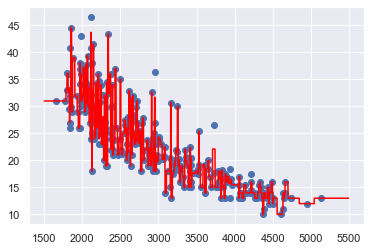

In [76]:
plt.scatter(x_train, y_train)
# plt.show()
a=np.arange(1500,5500)[:,np.newaxis]
b=dt.predict(a)
plt.plot(a,b,c="red")
plt.show()

In [ ]:
from sklearn.